install a conda package 
```
import sys
!conda install --yes --prefix {sys.prefix} numpy
```
install a pip package
```
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
```

setup 

setup proxy

In [ ]:
import os
os.environ['http_proxy'] = "http://127.0.0.1:33210" 
os.environ['https_proxy'] = "http://127.0.0.1:33210"

setup project

In [2]:
import sys
!{sys.executable} -m  pip install fastai duckduckgo_search
!{sys.executable} -m pip install nbdev

  Obtaining dependency information for lxml>=4.9.3 from https://files.pythonhosted.org/packages/00/c3/0e6e18ac7fbf9687440c7d54fb2f39055d61ade32545ab305e7e3186be73/lxml-4.9.4-cp311-cp311-win_amd64.whl.metadata
  Using cached lxml-4.9.4-cp311-cp311-win_amd64.whl.metadata (3.8 kB)
Using cached lxml-4.9.4-cp311-cp311-win_amd64.whl (3.8 MB)
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.2
    Uninstalling lxml-4.9.2:
      Successfully uninstalled lxml-4.9.2


In [9]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    with DDGS() as ddgs:
        # generator which yields dicts with:
        # {'title','image','thumbnail','url','height','width','source'}
        search_results = ddgs.images(keywords=term)       
        # grap number of max_images urls
        image_urls = [next(search_results).get("image") for _ in range(max_images)]
        # convert to L (functionally extended list class from fastai)
        return L(image_urls)

In [10]:
urls = search_images('sexy girls', max_images=2)
urls[0]

Searching for 'sexy girls'


'http://photos.theworldbeast.com/wp-content/uploads/2017/03/hot-girls-4.jpg'

In [13]:
from fastdownload import download_url
dest="bird.jpg"
download_url(urls[1],dest,show_progress=False)

Path('bird.jpg')

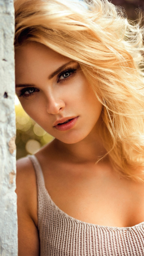

In [14]:
from fastai.vision.all import *
im=Image.open(dest)
im.to_thumb(256,256)

In [12]:
doc(im.to_thumb)